In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np

Assumsion:
- This year is 2020
- We are travel booking company and we provide the flight booking and hotel booking services for all flight and hotel over the world
- We are charging 10% commision for each booking (flight and hotel). 
- So in this analysis we are trying to figure out is there any way to increase our revenue and trade off if any
- Flight:
    - We assume each flight from A --> B then go back B --> A is 1 round trip flight


#### Data Preparation

In [2]:
flight_df = pd.read_csv('./data/flights.csv')
hotel_df = pd.read_csv('./data/hotels.csv')
user_df = pd.read_csv('./data/users.csv')

##### User data

In [3]:
user_df.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


##### Flight data

In [4]:
flight_df['date'] = pd.to_datetime(flight_df['date'])
flight_df['month']= pd.DatetimeIndex(flight_df['date']).month
flight_df['year']= pd.DatetimeIndex(flight_df['date']).year
flight_df['flight_trip']= flight_df.groupby('travelCode')['travelCode'].rank(method='first')
#flight_df['flight_trip_by_user']= flight_df.groupby('userCode')['travelCode'].rank(method='first')
departure_flight_df = flight_df[(flight_df['flight_trip']==1)]
arrival_flight_df = flight_df[(flight_df['flight_trip']==2)]
new_flight_df = departure_flight_df.merge(arrival_flight_df, left_on =['travelCode','userCode'], right_on=['travelCode','userCode'], suffixes=('_departure', '_arrival'))
print(len(new_flight_df))
new_flight_df.head()

135944


,travelCode,userCode,from_departure,to_departure,flightType_departure,price_departure,time_departure,distance_departure,agency_departure,date_departure,month_departure,year_departure,flight_trip_departure,from_arrival,to_arrival,flightType_arrival,price_arrival,time_arrival,distance_arrival,agency_arrival,date_arrival,month_arrival,year_arrival,flight_trip_arrival
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,9,2019,1.0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,9,2019,2.0
1,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,10,2019,1.0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,10,2019,2.0
2,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,10,2019,1.0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,2019-10-12,10,2019,2.0
3,3,0,Aracaju (SE),Campo Grande (MS),economic,743.54,1.69,650.10,Rainbow,2019-10-17,10,2019,1.0,Campo Grande (MS),Aracaju (SE),economic,877.56,1.69,650.10,Rainbow,2019-10-20,10,2019,2.0
4,4,0,Recife (PE),Florianopolis (SC),economic,803.39,1.76,676.53,Rainbow,2019-10-24,10,2019,1.0,Florianopolis (SC),Recife (PE),economic,695.30,1.76,676.53,Rainbow,2019-10-26,10,2019,2.0


##### Hotel Data

In [5]:
hotel_df['month']= pd.DatetimeIndex(hotel_df['date']).month
hotel_df['year']= pd.DatetimeIndex(hotel_df['date']).year
hotel_df['hotel_revenue'] = hotel_df['total']*0.1
hotel_df.head()


,travelCode,userCode,name,place,days,price,total,date,month,year,hotel_revenue
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019,9,2019,125.208
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019,10,2019,52.682
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019,11,2019,79.023
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019,12,2019,105.364
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019,12,2019,31.302


##### Combine User, flight and hotel data

In [6]:
new_df = user_df.merge(new_flight_df, left_on ='code', right_on ='userCode', how ='left',suffixes=('_user', '_flight'))
new_df = new_df.merge(hotel_df, left_on =['code', 'travelCode'], right_on =['userCode','travelCode'], how ='left', suffixes=('', '_hotel'))
new_df = new_df.drop(columns=['userCode','userCode_hotel'])
new_df = new_df.rename(columns={'travelCode_user':'travelCode'})
new_df['date_diff'] = new_df['date_arrival'] - new_df['date_departure']
new_df['date_diff'] = new_df['date_diff'] / np.timedelta64(1, 'D')
new_df.loc[new_df['travelCode'].isnull(),'flight'] = 'No'
new_df.loc[new_df['travelCode'].notnull(), 'flight'] = 'Yes'
new_df.loc[new_df['name_hotel'].isnull(),'flight_with_hotel'] = 'No'
new_df.loc[new_df['name_hotel'].notnull(), 'flight_with_hotel'] = 'Yes'
new_df['flight_revenue'] = (new_df['price_departure']*0.1) + (new_df['price_arrival']*0.1)
new_df.loc[new_df['hotel_revenue'].isnull(),'hotel_revenue'] = 0
new_df['total_revenue'] = new_df['flight_revenue'] +new_df['hotel_revenue']
new_df = new_df[(new_df['flight']=='Yes')]
print(len(new_df))
new_df.head(10)

135944


,code,company,name,gender,age,travelCode,from_departure,to_departure,flightType_departure,price_departure,time_departure,distance_departure,agency_departure,date_departure,month_departure,year_departure,flight_trip_departure,from_arrival,to_arrival,flightType_arrival,price_arrival,time_arrival,distance_arrival,agency_arrival,date_arrival,month_arrival,year_arrival,flight_trip_arrival,name_hotel,place,days,price,total,date,month,year,hotel_revenue,date_diff,flight,flight_with_hotel,flight_revenue,total_revenue
0,0,4You,Roy Braun,male,21,0.0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,9.0,2019.0,1.0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,9.0,2019.0,2.0,Hotel A,Florianopolis (SC),4.0,313.02,1252.08,09/26/2019,9.0,2019.0,125.208,4.0,Yes,Yes,272.667,397.875
1,0,4You,Roy Braun,male,21,1.0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,10.0,2019.0,1.0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,10.0,2019.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.0,Yes,No,261.488,261.488
2,0,4You,Roy Braun,male,21,2.0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,10.0,2019.0,1.0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,2019-10-12,10.0,2019.0,2.0,Hotel K,Salvador (BH),2.0,263.41,526.82,10/10/2019,10.0,2019.0,52.682,2.0,Yes,Yes,321.597,374.279
3,0,4You,Roy Braun,male,21,3.0,Aracaju (SE),Campo Grande (MS),economic,743.54,1.69,650.10,Rainbow,2019-10-17,10.0,2019.0,1.0,Campo Grande (MS),Aracaju (SE),economic,877.56,1.69,650.10,Rainbow,2019-10-20,10.0,2019.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,3.0,Yes,No,162.110,162.110
4,0,4You,Roy Braun,male,21,4.0,Recife (PE),Florianopolis (SC),economic,803.39,1.76,676.53,Rainbow,2019-10-24,10.0,2019.0,1.0,Florianopolis (SC),Recife (PE),economic,695.30,1.76,676.53,Rainbow,2019-10-26,10.0,2019.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,2.0,Yes,No,149.869,149.869
5,0,4You,Roy Braun,male,21,5.0,Brasilia (DF),Aracaju (SE),firstClass,1287.52,1.11,425.98,FlyingDrops,2019-10-31,10.0,2019.0,1.0,Aracaju (SE),Brasilia (DF),firstClass,898.04,1.11,425.98,FlyingDrops,2019-11-01,11.0,2019.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.0,Yes,No,218.556,218.556
6,0,4You,Roy Braun,male,21,6.0,Recife (PE),Florianopolis (SC),premium,1070.54,1.76,676.53,Rainbow,2019-11-07,11.0,2019.0,1.0,Florianopolis (SC),Recife (PE),premium,1013.40,1.76,676.53,Rainbow,2019-11-10,11.0,2019.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,3.0,Yes,No,208.394,208.394
7,0,4You,Roy Braun,male,21,7.0,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,2019-11-14,11.0,2019.0,1.0,Salvador (BH),Aracaju (SE),economic,811.73,2.16,830.86,CloudFy,2019-11-17,11.0,2019.0,2.0,Hotel K,Salvador (BH),3.0,263.41,790.23,11/14/2019,11.0,2019.0,79.023,3.0,Yes,Yes,177.656,256.679
8,0,4You,Roy Braun,male,21,8.0,Recife (PE),Sao Paulo (SP),economic,513.06,1.26,486.52,CloudFy,2019-11-21,11.0,2019.0,1.0,Sao Paulo (SP),Recife (PE),economic,829.91,1.26,486.52,CloudFy,2019-11-24,11.0,2019.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,3.0,Yes,No,134.297,134.297
9,0,4You,Roy Braun,male,21,9.0,Brasilia (DF),Campo Grande (MS),economic,583.60,0.72,277.70,CloudFy,2019-11-28,11.0,2019.0,1.0,Campo Grande (MS),Brasilia (DF),economic,506.56,0.72,277.70,CloudFy,2019-11-30,11.0,2019.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,2.0,Yes,No,109.016,109.016


In [17]:
revenue_info = new_df[['total_revenue','year_departure']].groupby('year_departure').sum().reset_index()
revenu_info1 = new_df[['flight_revenue','year_departure']].groupby('year_departure').sum().reset_index()
revenu_info2 = new_df[['hotel_revenue','year_departure']].groupby('year_departure').sum().reset_index()
flight_info = new_df[['travelCode','year_departure']].groupby('year_departure').count().reset_index().rename(columns={'travelCode':'total_flight'})
user_info0 = new_df[['code','year_departure']].groupby(['code','year_departure']).count().reset_index()
user_info0 = user_info0.groupby('year_departure').count().reset_index().rename(columns={'code':'total_user_flight'})
revenue_info = revenue_info.merge(flight_info, on ='year_departure')
revenue_info = revenue_info.merge(revenu_info1, on ='year_departure')
revenue_info = revenue_info.merge(revenu_info2, on ='year_departure')
revenue_info = revenue_info.merge(user_info0, on ='year_departure')
revenue_info['avg_flight_per_user'] = revenue_info['total_flight']/revenue_info['total_user_flight']
revenue_info['avg_flight_revenue_per_user'] = revenue_info['flight_revenue']/revenue_info['total_user_flight']
revenue_info                                                              

,year_departure,total_revenue,total_flight,flight_revenue,hotel_revenue,total_user_flight,avg_flight_per_user,avg_flight_revenue_per_user
0,2019.0,3.698317e+06,17913,3.412428e+06,285889.214,1335,13.417978,2556.125920
1,2020.0,1.176454e+07,56735,1.085945e+07,905089.748,1233,46.013788,8807.336036
2,2021.0,7.767330e+06,37449,7.167351e+06,599979.705,896,41.795759,7999.275371
3,2022.0,4.321939e+06,20716,3.989000e+06,332939.678,553,37.461121,7213.381127
4,2023.0,6.522739e+05,3131,6.016543e+05,50619.576,211,14.838863,2851.442100


<AxesSubplot:xlabel='year_departure'>

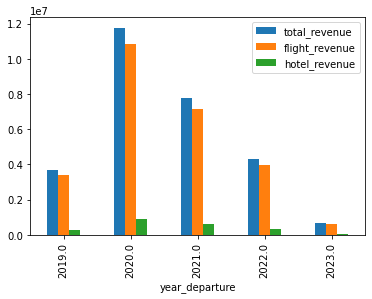

In [18]:
revenue_info[['total_revenue','flight_revenue','hotel_revenue','year_departure']].plot(x= 'year_departure', kind='bar')

From the chart we saw that most of the revenue come from flight revenue but the revenue will decrease in 2021, 2022 and 2023

<AxesSubplot:xlabel='year_departure'>

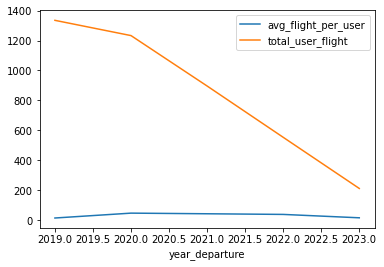

In [19]:
revenue_info[['avg_flight_per_user','total_user_flight','year_departure']].plot(x= 'year_departure')

Total unique user flight will be decreased in 2021 to 2023 but the Avg flight per user slightly remain in 2021 and 2023. it mean there are a group of user who flight more than other

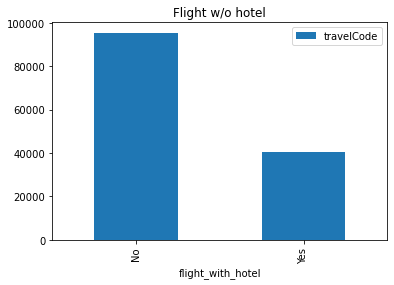

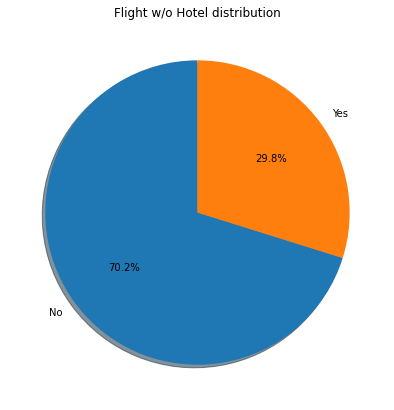

In [10]:
flight_w_hotel_df = new_df[['travelCode','flight_with_hotel']].groupby(['travelCode','flight_with_hotel']).count().reset_index()
flight_w_hotel_df.groupby('flight_with_hotel').count().reset_index().plot(kind='bar', x='flight_with_hotel', title='Flight w/o hotel')
labels = flight_w_hotel_df['flight_with_hotel'].value_counts(sort = True).index
sizes = flight_w_hotel_df['flight_with_hotel'].value_counts(sort = True)
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Flight w/o Hotel distribution')
plt.show()

Interm of hotel. 70% number of flight without booking hotel so if we can increase the number of flight with hotel booking we can increase the hotel revenue and total revenue

We will split the flight with and without hotel to see what difference between them

In [11]:
flight_w_hotel = new_df[(new_df['flight_with_hotel']=='Yes')]
flight_wo_hotel = new_df[(new_df['flight_with_hotel']=='No')]
flight_wo_hotel = flight_wo_hotel[(flight_wo_hotel['year_departure']>2020)]
flight_wo_hotel.head()

,code,company,name,gender,age,travelCode,from_departure,to_departure,flightType_departure,price_departure,time_departure,distance_departure,agency_departure,date_departure,month_departure,year_departure,flight_trip_departure,from_arrival,to_arrival,flightType_arrival,price_arrival,time_arrival,distance_arrival,agency_arrival,date_arrival,month_arrival,year_arrival,flight_trip_arrival,name_hotel,place,days,price,total,date,month,year,hotel_revenue,date_diff,flight,flight_with_hotel,flight_revenue,total_revenue
67,0,4You,Roy Braun,male,21,67.0,Recife (PE),Aracaju (SE),economic,663.23,1.44,555.74,Rainbow,2021-01-07,1.0,2021.0,1.0,Aracaju (SE),Recife (PE),economic,602.49,1.44,555.74,Rainbow,2021-01-10,1.0,2021.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,Yes,No,126.572,126.572
68,0,4You,Roy Braun,male,21,68.0,Recife (PE),Salvador (BH),firstClass,1470.41,2.05,788.55,Rainbow,2021-01-14,1.0,2021.0,1.0,Salvador (BH),Recife (PE),firstClass,1440.25,2.05,788.55,Rainbow,2021-01-17,1.0,2021.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,Yes,No,291.066,291.066
69,0,4You,Roy Braun,male,21,69.0,Recife (PE),Sao Paulo (SP),premium,670.13,1.26,486.52,Rainbow,2021-01-21,1.0,2021.0,1.0,Sao Paulo (SP),Recife (PE),premium,1145.72,1.26,486.52,Rainbow,2021-01-25,1.0,2021.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,Yes,No,181.585,181.585
70,0,4You,Roy Braun,male,21,70.0,Aracaju (SE),Sao Paulo (SP),firstClass,756.30,1.02,392.76,FlyingDrops,2021-01-28,1.0,2021.0,1.0,Sao Paulo (SP),Aracaju (SE),firstClass,1269.73,1.02,392.76,FlyingDrops,2021-01-29,1.0,2021.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,Yes,No,202.603,202.603
71,0,4You,Roy Braun,male,21,71.0,Brasilia (DF),Salvador (BH),firstClass,1724.49,1.76,676.56,FlyingDrops,2021-02-04,2.0,2021.0,1.0,Salvador (BH),Brasilia (DF),firstClass,1020.08,1.76,676.56,FlyingDrops,2021-02-07,2.0,2021.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,Yes,No,274.457,274.457


To boost the hotel revenue, We will create a simple program to: 
- Offer the customer in same company, departure, arrival, same lenght of stay date but without hotel booking 
- To stay in the same hotel with same price to see how much revenue do we generated in 2021 onward

In [12]:

flight_w_hotel_offer = flight_wo_hotel[['company','from_departure','to_departure','flightType_departure','date_diff','month_departure','year_departure']].merge(flight_w_hotel[['company','from_departure','to_departure','flightType_departure','date_diff','month_departure','year_departure','name_hotel','price','total','hotel_revenue']], on =['company','from_departure','to_departure','flightType_departure','date_diff','month_departure','year_departure'])
flight_w_hotel_offer= flight_w_hotel_offer.drop_duplicates()
additional_revenue = flight_w_hotel_offer[['hotel_revenue','year_departure']].groupby('year_departure').sum().reset_index().rename(columns={'hotel_revenue':'additional_revenue'})
print('Additional revenue will be generated if we offer hotel booking is',round(additional_revenue['additional_revenue'].sum(),2))
additional_revenue

Additional revenue will be generated if we offer hotel booking is 509305.66


,year_departure,additional_revenue
0,2021.0,307793.344
1,2022.0,182919.654
2,2023.0,18592.660


In [22]:
revenue_info = revenue_info.merge(additional_revenue, on ='year_departure', how ='left')
revenue_info.loc[revenue_info['additional_revenue'].isnull(),'additional_revenue'] = 0
revenue_info['total_revenue_new'] = revenue_info['flight_revenue']+revenue_info['hotel_revenue'] + revenue_info['additional_revenue']
revenue_info

,year_departure,total_revenue,total_flight,flight_revenue,hotel_revenue,total_user_flight,avg_flight_per_user,avg_flight_revenue_per_user,additional_revenue,total_revenue_new
0,2019.0,3.698317e+06,17913,3.412428e+06,285889.214,1335,13.417978,2556.125920,0.000,3.698317e+06
1,2020.0,1.176454e+07,56735,1.085945e+07,905089.748,1233,46.013788,8807.336036,0.000,1.176454e+07
2,2021.0,7.767330e+06,37449,7.167351e+06,599979.705,896,41.795759,7999.275371,307793.344,8.075124e+06
3,2022.0,4.321939e+06,20716,3.989000e+06,332939.678,553,37.461121,7213.381127,182919.654,4.504859e+06
4,2023.0,6.522739e+05,3131,6.016543e+05,50619.576,211,14.838863,2851.442100,18592.660,6.708665e+05


- We will be generated more than 500k revenue if we offer hotel booking to customer. But life is not dream, we have to give some promo to customer to make the offer more interesting. 
- Example if we give 10$ discount on total price for every booking how much does it cost and how much revenue do we generated


In [23]:
flight_w_hotel_offer1 = flight_wo_hotel[['company','from_departure','to_departure','flightType_departure','date_diff','month_departure','year_departure']].merge(flight_w_hotel[['company','from_departure','to_departure','flightType_departure','date_diff','month_departure','year_departure','name_hotel','price','total','hotel_revenue']], on =['company','from_departure','to_departure','flightType_departure','date_diff','month_departure','year_departure'])
flight_w_hotel_offer1= flight_w_hotel_offer1.drop_duplicates()
flight_w_hotel_offer1['cost'] = 10
flight_w_hotel_offer1['hotel_revenue_new'] = flight_w_hotel_offer1['hotel_revenue'] - flight_w_hotel_offer1['cost']
additional_revenue1 = flight_w_hotel_offer1[['hotel_revenue_new','year_departure']].groupby('year_departure').sum().reset_index().rename(columns={'hotel_revenue_new':'additional_revenue_senario_2'})
additional_cost1 = flight_w_hotel_offer1[['cost','year_departure']].groupby('year_departure').sum().reset_index()
print('Additional revenue will be generated if we offer hotel booking with 10$ voucher off in total price for each booking is {} \nAnd the cost of this promo campain is {}'.format(round(additional_revenue1['additional_revenue_senario_2'].sum(),2), round(additional_cost1['cost'].sum(),2)))
additional_revenue1

Additional revenue will be generated if we offer hotel booking with 10$ voucher off in total price for each booking is 414285.66 
And the cost of this promo campain is 95020


,year_departure,additional_revenue_senario_2
0,2021.0,250153.344
1,2022.0,149159.654
2,2023.0,14972.660


In this case our revenue generated has been decreased because we already spent 95k for promo voucher

Besides this senario we can create other senario such as:
- Offer promo based on number of day stay at hotel 
- Offer based on the frequency of user travel
- Offer based on difference group of user
- Offer user to buy subscription voucher to have discount on flight and hotel

There are lot of senario we can think about and estimate but for each senario we need to consider on trade off on cost and user engagement then we can do AB test to see hoow does it work